In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

**Loading** **Dataset**

In [8]:
df=pd.read_csv("/content/data.csv")
df.head()
df.dropna(how='any',inplace=True)

In [9]:
df.info()
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Changing data type of monthly charges

In [10]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()
df.dropna(how='any',inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
X=pd.get_dummies(df.drop(['Churn','customerID'],axis=1),dtype=int)
Y=df['Churn'].values
Y=pd.get_dummies(Y,drop_first=True,dtype=int)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
model=StandardScaler()
X_train_sc=model.fit_transform(X_train)
X_test_sc=model.transform(X_test)
from sklearn.decomposition import KernelPCA
pca=KernelPCA(n_components=10)
X_train_pca=pca.fit_transform(X_train_sc)
X_test_pca=pca.transform(X_test_sc)
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_train_resampled, Y_train_resampled = smote_enn.fit_resample(X_train_sc, Y_train)




In [12]:
from sklearn.linear_model import LogisticRegression

LG=LogisticRegression()
LG.fit(X_train_sc,Y_train)
Y_pred=LG.predict(X_test_sc)
report=classification_report(Y_test,Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train_sc,Y_train)
Y_pred=RF.predict(X_test_sc)
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_depth=[int(x) for x in np.linspace(10,110,num=11)]
min_samples_split=[1,2,5,10,20,50,100,500,700]
min_samples_leaf=[1,2,4,5,6,7,8,11,20,50]
bootstrap=[True,False]
param_dist={'n_estimators':n_estimators,'max_depth':max_depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,'bootstrap':bootstrap}

TunedRF=RandomizedSearchCV(RF, param_dist, cv=5)
TunedRF.fit(X_train_sc,Y_train)

best_random=TunedRF.best_estimator_
print(best_random)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

KeyboardInterrupt: 

RandomForestClassifier(max_depth=40, min_samples_leaf=6, min_samples_split=10,
                       n_estimators=1600)

In [14]:
model = RandomForestClassifier(max_depth=40, min_samples_leaf=6, min_samples_split=10,
                       n_estimators=1600)
model.fit(X_train_sc,Y_train)
Y_pred=model.predict(X_test_sc)
report=classification_report(Y_test,Y_pred)
print(report)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.66      0.47      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



***Huge improvement after SMOTEENN ***

In [15]:
model = RandomForestClassifier(max_depth=40, min_samples_leaf=6, min_samples_split=10,
                       n_estimators=1600)
model.fit(X_train_resampled,Y_train_resampled)
Y_pred=model.predict(X_test_sc)
report=classification_report(Y_test,Y_pred)
print(report)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.91      0.66      0.77      1033
           1       0.47      0.83      0.60       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.68      1407
weighted avg       0.80      0.71      0.72      1407



In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
XGB= XGBClassifier()
XGB.fit(X_train_sc,Y_train)
Y_pred=XGB.predict(X_test_sc)
report=classification_report(Y_test,Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.58      0.50      0.54       374

    accuracy                           0.77      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407



In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
XGB=XGBClassifier()
from sklearn.model_selection import RandomizedSearchCV
param_dist={'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 8, 10],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0],
    'reg_alpha': [0, 0.001, 0.01, 0.1, 1],
    'reg_lambda': [0.5, 1, 1.5, 2]

}
TunedXG=RandomizedSearchCV(XGB, param_dist, cv=5)
TunedXG.fit(X_train_sc,Y_train)

Y_pred=TunedXG.predict(X_test_sc)

best_random=TunedXG.best_estimator_
print(best_random)




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=7, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)


In [19]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

XGB = XGBClassifier(eval_metric="logloss")   # add eval_metric

TunedXG = RandomizedSearchCV(
    estimator=XGB,
    param_distributions=param_dist,
    n_iter=40,              # number of random combos
    scoring='recall',       # or 'f1' or 'roc_auc'
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

TunedXG.fit(X_train_sc, Y_train)

best_random = TunedXG.best_estimator_
print("Best params:", TunedXG.best_params_)

Y_pred = best_random.predict(X_test_sc)
print(classification_report(Y_test, Y_pred))


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best params: {'subsample': 0.7, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 300, 'min_child_weight': 7, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.7}
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [20]:
# Random Forest predictions
y_pred_rf = model.predict(X_test_sc)
y_prob_rf = model.predict_proba(X_test_sc)[:, 1]

# Tuned XGBoost predictions
best_xgb = TunedXG.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_sc)
y_prob_xgb = best_xgb.predict_proba(X_test_sc)[:, 1]



## 6.1 Confusion Matrix – Random Forest vs XGBoost


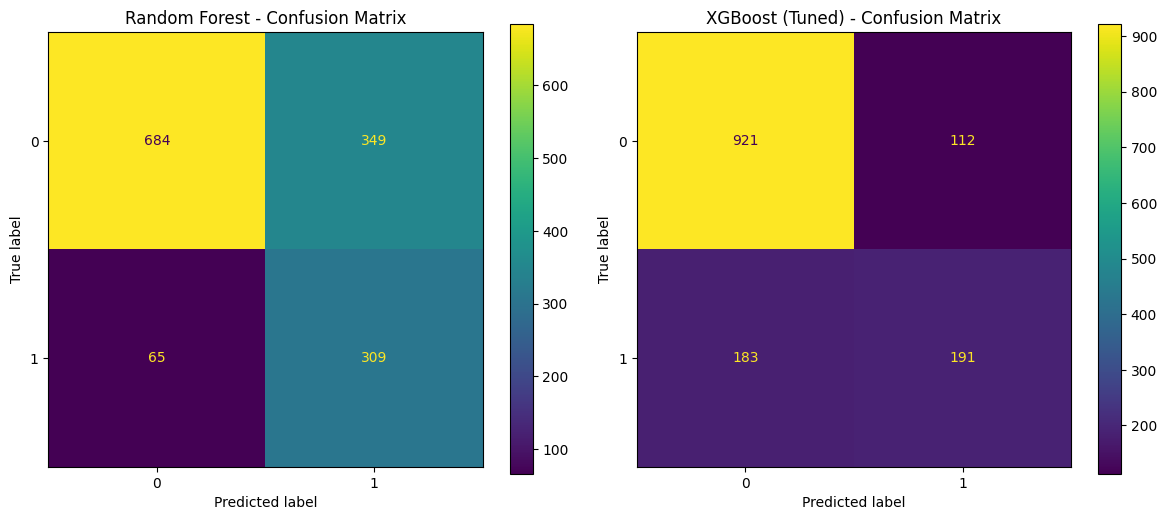

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_rf, ax=axes[0])
axes[0].set_title("Random Forest - Confusion Matrix")

ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_xgb, ax=axes[1])
axes[1].set_title("XGBoost (Tuned) - Confusion Matrix")

plt.tight_layout()
plt.show()


## 6.2 ROC Curve – Random Forest vs Tuned XGBoost


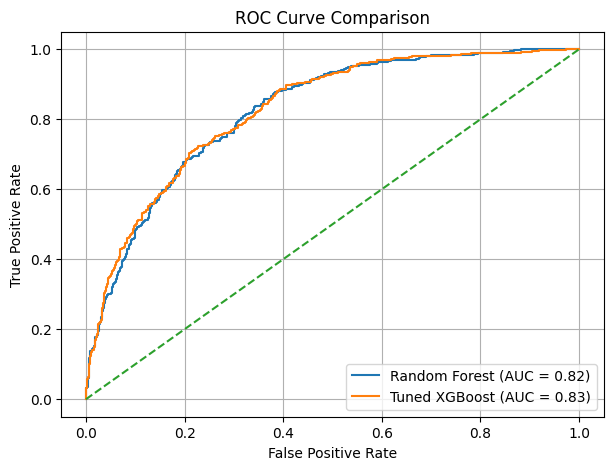

In [22]:
from sklearn.metrics import roc_curve, auc

fpr_rf, tpr_rf, _ = roc_curve(Y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(Y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(7, 5))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"Tuned XGBoost (AUC = {roc_auc_xgb:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


## 6.3 Metric Comparison Table


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

results = [
    {
        "Model": "Random Forest (SMOTEENN)",
        "Accuracy": accuracy_score(Y_test, y_pred_rf),
        "Precision (Churn)": precision_score(Y_test, y_pred_rf),
        "Recall (Churn)": recall_score(Y_test, y_pred_rf),
        "F1-Score (Churn)": f1_score(Y_test, y_pred_rf)
    },
    {
        "Model": "Tuned XGBoost",
        "Accuracy": accuracy_score(Y_test, y_pred_xgb),
        "Precision (Churn)": precision_score(Y_test, y_pred_xgb),
        "Recall (Churn)": recall_score(Y_test, y_pred_xgb),
        "F1-Score (Churn)": f1_score(Y_test, y_pred_xgb)
    }
]

df_compare = pd.DataFrame(results)
df_compare


,Model,Accuracy,Precision (Churn),Recall (Churn),F1-Score (Churn)
0,Random Forest (SMOTEENN),0.705757,0.469605,0.826203,0.598837
1,Tuned XGBoost,0.790334,0.630363,0.510695,0.564254


## 6.4 Feature Importance – Top Predictive Features


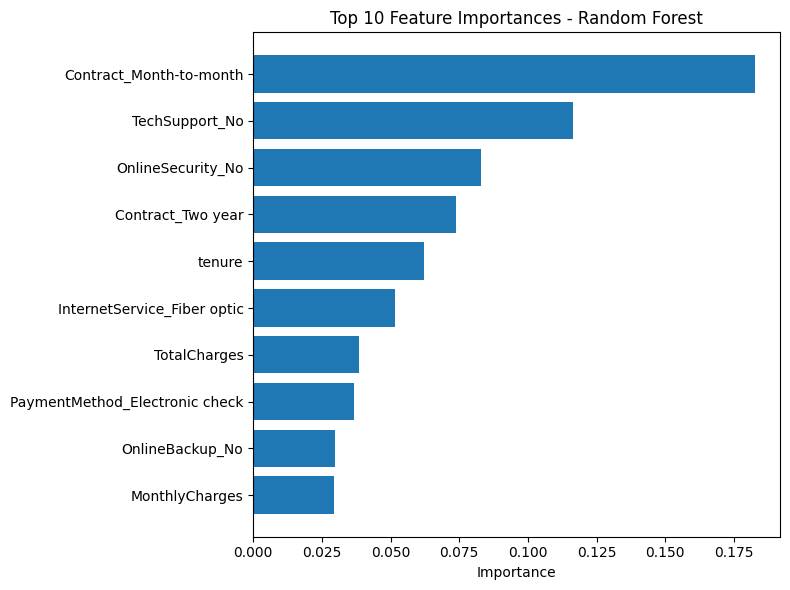

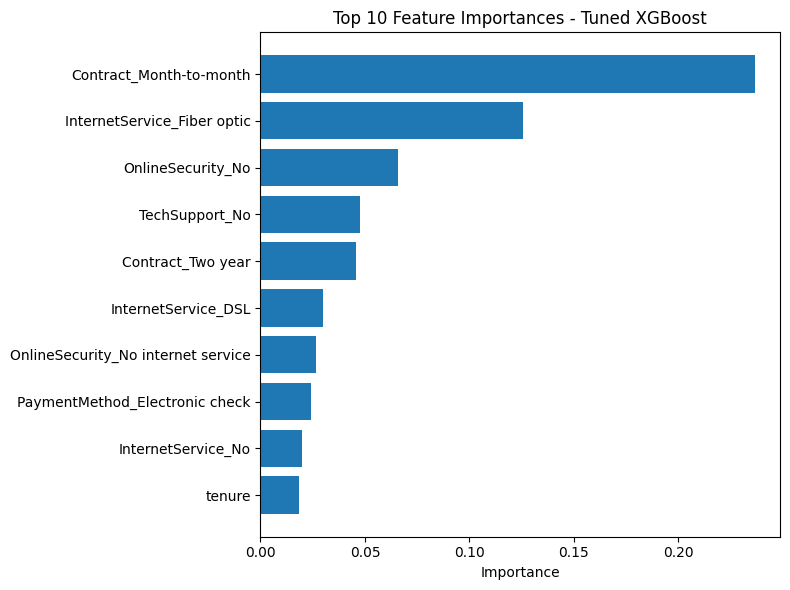

In [24]:
import numpy as np

rf_importances = model.feature_importances_
indices_rf = np.argsort(rf_importances)[::-1][:10]  # Top 10
features = X.columns

plt.figure(figsize=(8,6))
plt.barh(range(len(indices_rf)), rf_importances[indices_rf][::-1])
plt.yticks(range(len(indices_rf)), features[indices_rf][::-1])
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()
xgb_importances = best_xgb.feature_importances_
indices_xgb = np.argsort(xgb_importances)[::-1][:10]

plt.figure(figsize=(8,6))
plt.barh(range(len(indices_xgb)), xgb_importances[indices_xgb][::-1])
plt.yticks(range(len(indices_xgb)), features[indices_xgb][::-1])
plt.title("Top 10 Feature Importances - Tuned XGBoost")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [25]:
!pip freeze > requirements.txt
